In [49]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

df = pd.read_csv("pendulumData.csv")

df['sys uncert'] = df['sys uncert'].apply(lambda x: 0 if isinstance(x, str) and '+' in x else x)
df['stat uncert'] = df['stat uncert'].apply(lambda x: 0 if isinstance(x, str) and '+' in x else x)
df['total uncert'] = df['total uncert'].apply(lambda x: 0 if isinstance(x, str) and '+' in x else x)

df['sys uncert'] = pd.to_numeric(df['sys uncert']).fillna(0)
df['stat uncert'] = pd.to_numeric(df['stat uncert']).fillna(0)
df['total uncert'] = pd.to_numeric(df['total uncert']).fillna(df['stat uncert'].add(df['sys uncert']))

df = df[df['g (m/s2)'].notna()]
df = df[df['g (m/s2)'] < 100]
df = df[df['total uncert'].notna()]
print(df)

g = df['g (m/s2)'].to_numpy()
uncert = df['total uncert'].to_numpy()

mean_g = np.mean(g)
mean_uncert = np.mean(uncert)
std_g = np.std(g)
std_uncert = np.std(uncert)
print("mean g: ", mean_g)
print("mean uncert: ", mean_uncert)
print("var g: ", var_g)

               label  g (m/s2)  stat uncert  sys uncert  total uncert
0    20.Sep.X.B01.01     9.830       0.0075       0.000        0.0075
1    20.Sep.X.B01.02     9.060       0.1400       0.230        0.3700
2    20.Sep.X.B01.03     9.790       0.0200       0.020        0.0400
3    20.Sep.X.B01.04     9.882       0.0160       0.130        0.1460
5    20.Sep.X.B02.01     9.807       0.0010       0.008        0.0090
..               ...       ...          ...         ...           ...
229  23.Feb.A.B02.05    10.440       0.0000       0.000        0.3600
230  23.Feb.A.B02.06     8.500       0.0000       0.000        0.3000
231  23.Feb.A.B02.07    10.900       0.0000       0.000        1.3000
232  23.Feb.A.B02.08     9.550       0.0000       0.000        0.1300
233  23.Feb.A.B02.09    10.110       0.0000       0.000        0.2300

[233 rows x 5 columns]
mean g:  9.817732353472103
mean uncert:  0.3707510225150215
var g:  0.5362846355898961


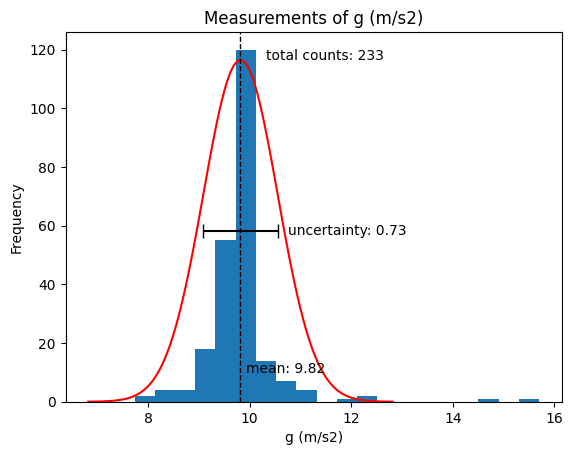

In [105]:
def gaussian(x, mu, sig):
    return np.exp(-np.power(x - mu, 2.) / (2 * np.power(sig, 2.)))

x_values = np.linspace(mean_g - 3, mean_g + 3, 120)
bin_width = 2
N = g.size / bin_width
plt.plot(x_values, N * gaussian(x_values, mean_g, std_g), color='red')
plt.hist(g, bins=20)

# Set axes
plt.xlabel('g (m/s2)')
plt.ylabel('Frequency')

# Annotate with mean and standard deviation
plt.annotate('mean: ' + str(round(mean_g, 2)), (mean_g + 0.1, 10), color='black')

# Annotate total counts
plt.annotate('total counts: ' + str(g.size), (mean_g + 0.5, N), color='black')

# Annotate uncertainty
plt.annotate('uncertainty: ' + str(round(std_g, 2)), (mean_g + std_g + 0.2, N / 2 - 1.5), color='black')

# Annotate the uncertainty with a horizontal error bar
plt.errorbar(mean_g, N / 2, xerr=std_g, color='black', capsize=5, capthick=1)

# Vertical line at mean
plt.axvline(mean_g, color='black', linestyle='--', linewidth=1)

# Set title
plt.title('Measurements of g (m/s2)')

plt.show()